Uji asumsi klasik


Analisis Regresi untuk age dan ['intubed', 'pneumonia', 'sex', 'pregnancy', 'diabetes', 'asthma', 'inmsupr', 'hypertension', 'cardiovascular', 'obesity']:

Shapiro-Wilk Test Statistic: 0.9930477738380432, p-value: 0.00012588518438860774
Normalitas: Residual tidak terdistribusi normal


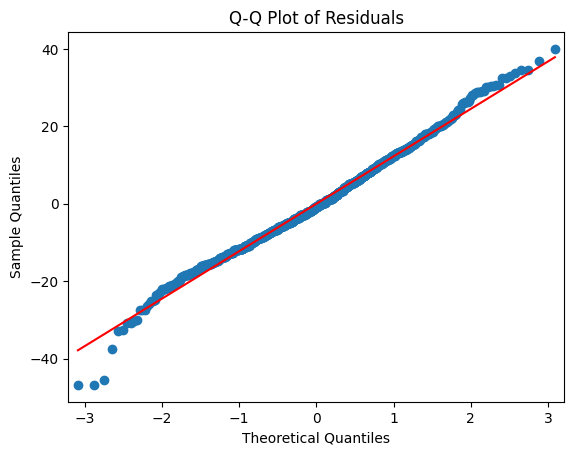

Breusch-Pagan Test Statistic: 48.826419908893584, p-value: 4.382678145808734e-07
Heteroskedastisitas: Ada indikasi heteroskedastisitas


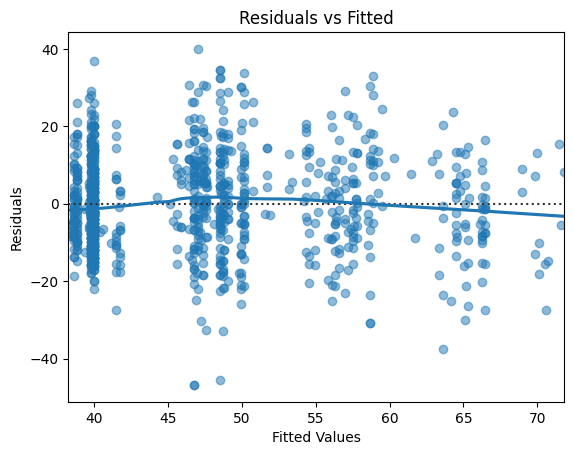

Durbin-Watson Statistic: 2.0579776080591454
Autokorelasi: Tidak ada indikasi autokorelasi



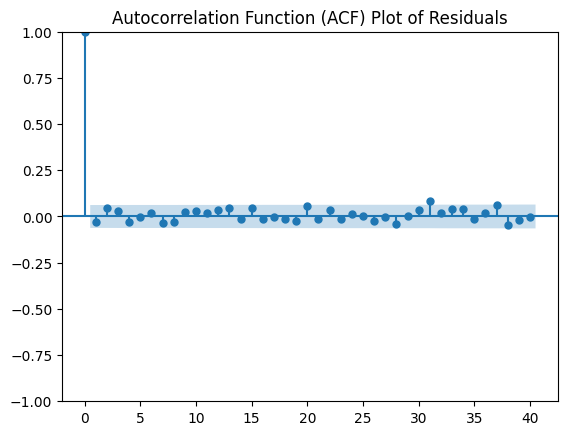

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV
data = pd.read_csv('Covid19Patient.csv', delimiter=',')

# Daftar variabel yang ingin dianalisis
variable_combinations = [
    ('age', ['intubed','pneumonia','sex','pregnancy','diabetes','asthma','inmsupr','hypertension','cardiovascular','obesity']),
    # Tambahkan kombinasi variabel lainnya sesuai kebutuhan
]

for dependent_var, independent_vars in variable_combinations:
    print("=" * 150)
    print(f"\nAnalisis Regresi untuk {dependent_var} dan {independent_vars}:\n")

    # Variabel dependen dan independen
    y = data[dependent_var]
    X = data[independent_vars]

    # Tambahkan konstanta ke variabel independen
    X = sm.add_constant(X)

    # Fit model regresi
    model = sm.OLS(y, X).fit()

    # # Tampilkan ringkasan hasil regresi
    # print(model.summary())

    # Uji Normalitas Residual
    shapiro_test_stat, shapiro_p_value = stats.shapiro(model.resid)
    print(f"Shapiro-Wilk Test Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}")
    if shapiro_p_value < 0.05:
        print("Normalitas: Residual tidak terdistribusi normal")
    else:
        print("Normalitas: Residual terdistribusi normal")

    # Visualisasi Q-Q Plot
    sm.qqplot(model.resid, line='s')
    plt.title('Q-Q Plot of Residuals')
    plt.show()

    # Uji Heteroskedastisitas
    bp_test_stat, bp_p_value, _, _ = het_breuschpagan(model.resid, X)
    print(f"Breusch-Pagan Test Statistic: {bp_test_stat}, p-value: {bp_p_value}")
    if bp_p_value < 0.05:
        print("Heteroskedastisitas: Ada indikasi heteroskedastisitas")
    else:
        print("Heteroskedastisitas: Tidak ada indikasi heteroskedastisitas")

    # Visualisasi Scatter Plot Residual vs Fitted
    sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, scatter_kws={'alpha': 0.5})
    plt.title('Residuals vs Fitted')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Uji Autokorelasi
    durbin_watson_stat = sm.stats.durbin_watson(model.resid)
    print(f"Durbin-Watson Statistic: {durbin_watson_stat}")

    if durbin_watson_stat < 1.5 or durbin_watson_stat > 2.5:
        print("Autokorelasi: Ada indikasi autokorelasi")
    else:
        print("Autokorelasi: Tidak ada indikasi autokorelasi\n")

    # Visualisasi Correlogram (ACF Plot)
    sm.graphics.tsa.plot_acf(model.resid, lags=40)
    plt.title('Autocorrelation Function (ACF) Plot of Residuals')
    plt.show()

1000 Data 10 Variabel No 2.2.2

In [16]:
import pandas as pd
import numpy as np

# Mengganti 'nama_file.csv' dengan nama file CSV yang sesuai
file_path = 'Covid19Patient.csv'

# Membaca data dari file CSV
data = pd.read_csv(file_path, delimiter=',')

# Memilih 10 variabel independen yang numerik
independent_variables = ['intubed', 'pneumonia', 'sex', 'pregnancy', 'diabetes','asthma','inmsupr','hypertension','cardiovascular','obesity']

# Menambahkan kolom konstanta ke variabel independen
X = np.column_stack((np.ones(len(data)), data[independent_variables]))

# Variabel dependen yang ingin diprediksi
y = data['age']  # Ganti 'Target_Variable' dengan variabel dependen yang sesuai

# Menghitung matriks (X'X) inverse
XtX_inv = np.linalg.inv(np.dot(X.T, X))

# Menghitung matriks (X'Y)
XtY = np.dot(X.T, y)

# Menghitung koefisien regresi
beta = np.dot(XtX_inv, XtY)

# Menampilkan koefisien regresi
print("Koefisien Regresi:")
for i, var in enumerate(['Intercept'] + independent_variables):
    print(f"{var}: {beta[i]}")

Koefisien Regresi:
Intercept: 96.45798185062904
intubed: -0.07363711443951027
pneumonia: -1.731570599734816
sex: -3.032879323390489
pregnancy: 0.029565891911058628
diabetes: -7.554344835185134
asthma: 0.3797887912188571
inmsupr: 0.13807453881419862
hypertension: -10.169404532573083
cardiovascular: -5.363368169837486
obesity: 1.1384831992878617


Uji Parsial, Simultan, Kebaikan No 3,4,5

In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

# Load data from CSV
data = pd.read_csv('Covid19Patient.csv', delimiter=',')

# Daftar variabel yang ingin dianalisis
variable_combinations = [
    ('age', ['intubed','pneumonia','sex','pregnancy','diabetes','asthma','inmsupr','hypertension','cardiovascular','obesity']),

    # Tambahkan kombinasi variabel lainnya sesuai kebutuhan
]

for dependent_var, independent_var in variable_combinations:
    print("🟰" * 55)
    print(f"\nAnalisis Regresi untuk {dependent_var} dan {independent_var}:\n")

    # Variabel dependen dan independen
    y = data[dependent_var]
    X = data[independent_var]

    # Tambahkan konstanta ke variabel independen
    X = sm.add_constant(X)

    # Fit model regresi
    model = sm.OLS(y, X).fit()

    # Tampilkan ringkasan hasil regresi
    print(model.summary())

    # Uji Simultan Regresi (F-statistik)
    f_statistic, f_p_value = sm.stats.linear_rainbow(model)
    print()
    print(f"F-statistic: {f_statistic}, p-value: {f_p_value}")
    if f_p_value < 0.05:
        print("Kesimpulan: Setidaknya satu variabel independen memiliki efek yang signifikan terhadap variabel dependen")
    else:
        print("Kesimpulan: Tidak ada bukti signifikansi keseluruhan model regresi")

    # Uji Kebaikan Model menggunakan R2
    r_squared = model.rsquared
    print()
    print(f"R-squared: {r_squared}\n")

🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰

Analisis Regresi untuk age dan ['intubed', 'pneumonia', 'sex', 'pregnancy', 'diabetes', 'asthma', 'inmsupr', 'hypertension', 'cardiovascular', 'obesity']:

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     45.34
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           2.27e-74
Time:                        08:43:51   Log-Likelihood:                -3924.1
No. Observations:                1000   AIC:                             7870.
Df Residuals:                     989   BIC:                             7924.
Df Model:                          10                                         
Covariance Type:            nonrobust                                       